In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from computeCostReg import computeCostReg
from featureNormalize import featureNormalize
from gradientDescentMultiReg import gradientDescentMultiReg

## 5th order fit without regularization

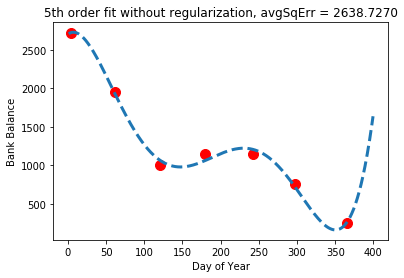

In [2]:
# day of year
x = np.mat('4; 62; 120; 180; 242; 297; 365')
# bank balance
y = np.mat('2720; 1950; 1000; 1150; 1140; 750; 250')

# bias term
bias = np.ones((x.shape[0],1))

# 5th order polynomial
m = np.hstack((bias, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5)))

# normal equation
w = np.dot(np.dot(np.linalg.inv(np.dot(m.T, m)), m.T), y)
h = np.dot(m, w)
avg_sq_err = np.sum(np.power(h - y, 2)) / y.shape[0]

# plot the graph
plt.plot(x, y, 'ro', markersize=10, linewidth=3)
plt.ylabel('Bank Balance')
plt.xlabel('Day of Year')

t = np.arange(1, 400, 0.5)
plot_x = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5))).T
plot_y = np.dot(plot_x, w)

plt.plot(t, plot_y, '--', markersize=10, linewidth=3)
plt.title('5th order fit without regularization, avgSqErr = %.4f' % avg_sq_err)
plt.savefig('hw3_q5.png')
plt.show()

## 5th order fit with regularization

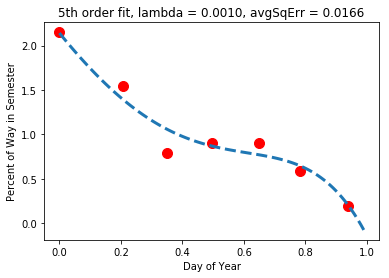

In [3]:
# percent of way in semester
x = np.mat('0; 0.2072; 0.3494; 0.4965; 0.6485; 0.7833; 0.9400')
# bank balance ($K)
y = np.mat('2.150; 1.541; 0.790; 0.909; 0.901; 0.593; 0.198')

# bias term
bias = np.ones((x.shape[0],1))

# 5th order polynomial
m = np.hstack((bias, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5)))

# regularization
lam = 0.001
# identity term
eye = np.identity(m.shape[1])
# do not penalize the constant coefficient
eye[0,0] = 0

# normal equation with regularization
w = np.dot(np.dot(np.linalg.inv(np.dot(m.T, m) + lam * eye), m.T), y)

h = np.dot(m, w)
avg_sq_err = np.sum(np.power(h - y, 2)) / y.shape[0]

# plot the graph
plt.plot(x, y, 'ro', markersize=10, linewidth=3)
plt.ylabel('Percent of Way in Semester')
plt.xlabel('Day of Year')

t = np.arange(0, 1, 0.01)
plot_x = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5))).T
plot_y = np.dot(plot_x, w)

plt.plot(t, plot_y, '--', markersize=10, linewidth=3)
plt.title('5th order fit, lambda = %.4f, avgSqErr = %.4f' % (lam,avg_sq_err))
plt.savefig('hw3_q6.png')
plt.show()

## Effect of regularization

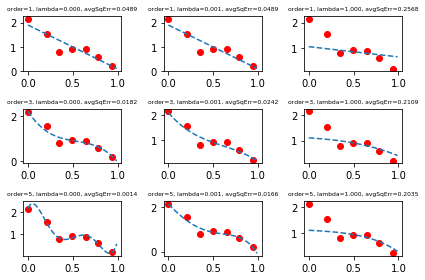

In [4]:
# percent of way in semester
x = np.mat('0; 0.2072; 0.3494; 0.4965; 0.6485; 0.7833; 0.9400')
# bank balance ($K)
y = np.mat('2.150; 1.541; 0.790; 0.909; 0.901; 0.593; 0.198')

# regularization term lambda
lams = np.array([0, 0.001, 1])

# order of polynomial
D = np.array([1, 3, 5])

# bias term
bias = np.ones((x.shape[0],1))

p1 = np.hstack((bias, x))
p2 = np.hstack((bias, x, np.power(x,2), np.power(x,3)))
p3 = np.hstack((bias, x, np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5)))
polys = [p1, p2, p3]

t = np.arange(0, 1, 0.01)
pt1 = np.vstack((np.ones(t.shape[0]), t)).T
pt2 = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3))).T
pt3 = np.vstack((np.ones(t.shape[0]), t, np.power(t,2), np.power(t,3), np.power(t,4), np.power(t,5))).T
pts = [pt1, pt2, pt3]

for i in range(0,3):
    for j in range(0,3):
        eye = np.identity(polys[i].shape[1])
        w = np.dot(np.dot(np.linalg.inv(np.dot(polys[i].T, polys[i]) + lams[j] * eye), polys[i].T), y)
        h = np.dot(polys[i], w)
        avg_sq_err = np.sum(np.power(h - y, 2)) / y.shape[0]
        plt.subplot(3,3,i*3+j+1)
        plt.title('order=%d, lambda=%.3f, avgSqErr=%.4f' % (D[i],lams[j],avg_sq_err), fontsize=6)
        plt.plot(x, y, 'ro')
        plot_y = np.dot(pts[i], w)
        plt.plot(t, plot_y, '--')
    # end
# end

plt.tight_layout()
plt.savefig('hw3_q7.png')
plt.show()

## Lasso plot

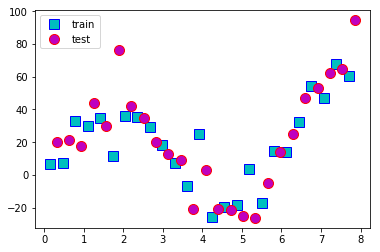

.

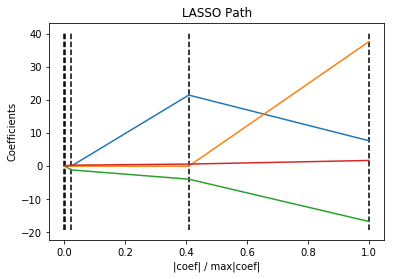

In [5]:
# random number generator seed
np.random.seed(2000)

mu = np.zeros(2)
sigma = np.mat('4 1.5; 1.5 2')

# create two features, 50 samples of each
r = np.random.multivariate_normal(mu,sigma,50)
y = r[:,1].reshape(-1,1)

# scale x for sin
x = np.pi * np.arange(1, 51).reshape(-1,1) / 20

# add some curvature
y = 10 * np.multiply(np.sin(x), 4 + y)

# gradually rise over time
y = y + x * 4

# odd samples for train
x_train = x[0::2,:]
y_train = y[0::2,:]

# even samples for test
x_test = x[1::2,:]
y_test = y[1::2,:]

bias = np.ones((x.shape[0],1))
xData = np.hstack((bias, x, np.power(x,2), np.power(x,3)))

# plot the data
plt.figure(1)
plt.plot(x_train, y_train, 'rs', markersize=10, linewidth=3, markerfacecolor='c', markeredgecolor='b')
plt.plot(x_test, y_test, 'ro',  markersize=10, linewidth=3, markerfacecolor='m', markeredgecolor='r')
plt.legend(['train','test'])
plt.savefig('hw3_q8_1.png')
plt.show()

# lasso plot
alphas, _, coefs = linear_model.lars_path(xData, y[:,0], method='lasso', verbose=True)
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(2)
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.savefig('hw3_q8_2.png')
plt.show()


## Cost function with regularization

In [8]:
# load Data
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,0:1].reshape((-1,1))
y = data[:,2].reshape((-1,1))

# scale features and set them to zero mean with std=1
Xnorm, mu, sigma = featureNormalize(X)

# add intercept term to X
bias = np.ones((X.shape[0],1))
# form a new matrix[bias xdata]
Xdata = np.hstack((bias,Xnorm))

# init Theta and lambda
theta = np.dot(np.dot(np.linalg.inv(np.dot(Xdata.T, Xdata)), Xdata.T), y)
lam = 1
         
# run Compute Cost
print('Cost with regularization: %d' % computeCostReg(Xdata, y, theta, lam))

Cost with regularization: 2058132740


## Gradient descent with regularization

In [19]:
# load Data
data = np.loadtxt('ex1data1.txt', delimiter=',')
X = data[:,0].reshape((-1,1))
y = data[:,1].reshape((-1,1))

# add intercept term to X
bias = np.ones((X.shape[0],1))
# form a new matrix[bias xdata]
M = np.hstack((bias,X))

theta_init = np.zeros((2,1))

# some gradient descent settings
iterations = 1500
alpha = 0.01
lam = 0

# run gradient descent
theta_unreg = gradientDescentMultiReg(M, y, theta_init, alpha, iterations, lam)
# normal equation
lin_reg = np.dot(np.dot(np.linalg.inv(np.dot(M.T, M)), M.T), y)

# regularization with lambda = 1
lam = 1
theta_reg = gradientDescentMultiReg(M, y, theta_init, alpha, iterations, lam)

print('Linear Regression:\n', lin_reg)
print('Gradient Descent:\n', theta_unreg)
print('Regularized Gradient Descent with lambda = 1:\n', theta_reg)

# regularization with lambda = 100
lam = 100
theta_reg = gradientDescentMultiReg(M, y, theta_init, alpha, iterations, lam)

print('Regularized Gradient Descent with lambda = 100:\n', theta_reg)

Linear Regression:
 [[-3.89578088]
 [ 1.19303364]]
Gradient Descent:
 [-3.63029144  1.16636235]
Regularized Gradient Descent with lambda = 1:
 [-3.47683658  1.15113426]
Regularized Gradient Descent with lambda = 100:
 [-0.65971874  0.87979806]
